In [17]:
import pandas as pd
import matplotlib.pyplot as plt

import librosa
import librosa.display


# Loading Data

Load data from [ESC-50 dataset ](https://github.com/karolpiczak/ESC-50)  a labeled collection of 2000 environmental audio recordings. Preprocess the data, droping the columns that doesn't give any info and setting the categories to numbers instead of text.

In [18]:
metadata = pd.read_csv("ESC-50-master/meta/esc50.csv")
metadata.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [19]:
metadata.dtypes

filename    object
fold         int64
target       int64
category    object
esc10         bool
src_file     int64
take        object
dtype: object

In [20]:
# Saving the categories mapping

categories = pd.Categorical(metadata["category"])
categories_map = dict(enumerate(categories.categories))
categories_map[18]


'dog'

In [21]:
# Making a new df with the necesary info

metadata["vervose_category"] = metadata["category"]

metadata["category"] = pd.Categorical(metadata["category"]).codes
metadata = metadata.drop(columns=["fold", "target", "esc10", "src_file", "take"])


In [22]:
metadata.head()

,filename,category,vervose_category
0,1-100032-A-0.wav,18,dog
1,1-100038-A-14.wav,7,chirping_birds
2,1-100210-A-36.wav,46,vacuum_cleaner
3,1-100210-B-36.wav,46,vacuum_cleaner
4,1-101296-A-19.wav,43,thunderstorm


In [23]:
print(len(metadata["category"].unique()))
metadata["category"].unique()


50


array([18,  7, 46, 43, 20,  3, 16,  9, 23,  6,  0, 33, 35, 45, 39, 48,  8,
       10, 31, 49, 24, 25, 13,  2,  4, 14, 28, 21, 36, 30, 32, 29, 22,  1,
       17, 27, 12, 26, 42, 44, 34, 47, 11, 41, 37, 38, 40,  5, 19, 15],
      dtype=int64)

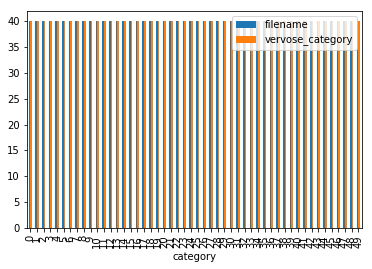

In [24]:
# Checking if the dataset is balanced

count_category = metadata.groupby('category').count()
count_category.plot(kind="bar")

# Testing audio to image converter

Lets convert the audio to waveplot and then to a spectogram to save the png files.

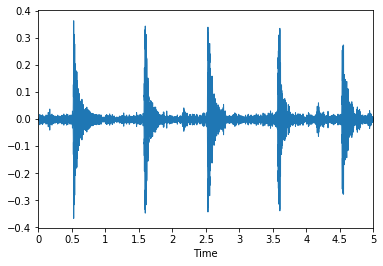

In [25]:
filename = metadata[metadata['vervose_category']=='clock_tick'].iloc[0]["filename"]
wav, sr = librosa.load('ESC-50-master/audio/'+ filename, sr=None)
librosa.display.waveplot(wav, sr)

In [26]:
import IPython.display as ipd
ipd.Audio('ESC-50-master/audio/'+ filename)

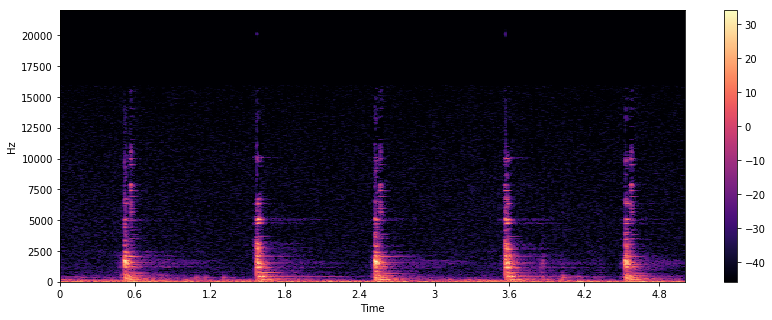

In [27]:
X = librosa.stft(wav)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


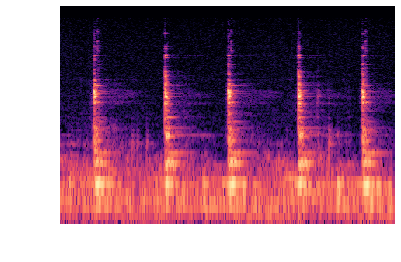

In [40]:
fig = plt.figure()
plt.axis('off')
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
fig.savefig('./imagetest/t0/test.png')

In [29]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [41]:
dataset = ImageFolder("imagetest", transform=ToTensor())


In [42]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 288, 432]) 0


tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [43]:
import matplotlib.pyplot as plt

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  t0 (0)


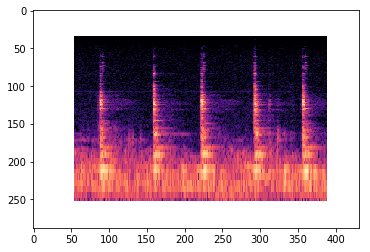

In [44]:
show_example(*dataset[0])